<a href="https://colab.research.google.com/github/SaxenaVaishnavi/BrushStrokes/blob/main/CYCLEGAN_VANGOGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-7bbqcp_x
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-7bbqcp_x
  Resolved https://github.com/tensorflow/examples.git to commit 0b14ce1c88537b94772cc99d995d936417be6f5d
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-examples: filename=tensorflow_examples-0.1699471818.63262868223049538191520590201343318150499692381-py3-none-any.whl size=301556 sha256=217096ed3674873b981c81fe483c9aa267f8bea256854738dd901be7578a1a2a
  Stored in directory: /tmp/pip-ephem-wheel-cache-b5zegvvk/wheels/72/5f/d0/7fe769eaa229bf20101d11a357eb23c83c481bee2d7f710599
Successfully built tensorflow-examples


In [ ]:
import tensorflow as tf

In [ ]:
#import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
os.environ["KAGGLE_USERNAME"] = "pallikadhingra"
os.environ["KAGGLE_KEY"] = "2155eaeb2bc1983bdcb70ae4d0c55faa"

!kaggle datasets download pipiking/cyclegan

100% 584M/585M [00:32<00:00, 17.4MB/s]
100% 585M/585M [00:32<00:00, 18.8MB/s]


In [ ]:
!unzip /content/cyclegan.zip

Streaming output truncated to the last 5000 lines.
  inflating: vangogh2photo/vangogh2photo/trainB/2015-02-12 11:31:32.jpg  
  inflating: vangogh2photo/vangogh2photo/trainB/2015-02-12 12:30:32.jpg  
  inflating: vangogh2photo/vangogh2photo/trainB/2015-02-12 19:51:27.jpg  
  inflating: vangogh2photo/vangogh2photo/trainB/2015-02-12 20:53:44.jpg  
  inflating: vangogh2photo/vangogh2photo/trainB/2015-02-12 21:31:48.jpg  
  inflating: vangogh2photo/vangogh2photo/trainB/2015-02-13 09:22:26.jpg  
  inflating: vangogh2photo/vangogh2photo/trainB/2015-02-13 10:07:16.jpg  
  inflating: vangogh2photo/vangogh2photo/trainB/2015-02-13 13:57:11.jpg  
  inflating: vangogh2photo/vangogh2photo/trainB/2015-02-13 16:02:50.jpg  
  inflating: vangogh2photo/vangogh2photo/trainB/2015-02-13 16:45:49.jpg  
  inflating: vangogh2photo/vangogh2photo/trainB/2015-02-14 00:09:27.jpg  
  inflating: vangogh2photo/vangogh2photo/trainB/2015-02-14 02:21:28.jpg  
  inflating: vangogh2photo/vangogh2photo/trainB/2015-02-14 02

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from tqdm import tqdm

In [ ]:
train_vangogh = "/content/vangogh2photo/trainA"
train_photos = "/content/vangogh2photo/trainB"
images_height = 256
images_width = 256

In [ ]:
def random_crop(image):
  cropped_image = tf.image.random_crop(
      image, size=[images_height, images_width, 3])

  return cropped_image

In [ ]:
def random_jitter(image):
  # resizing to 286 x 286 x 3
  image = tf.image.resize(image, [286, 286],
                          method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  # randomly cropping to 256 x 256 x 3
  image = random_crop(image)

  # random mirroring
  image = tf.image.random_flip_left_right(image)

  return image

In [ ]:
images_vangogh = os.listdir(train_vangogh)
images_photos = os.listdir(train_photos)

In [ ]:
n_vangogh = len(images_vangogh)
n_photos = len(images_photos)

In [ ]:
n_vangogh = 40
n_photos = 10
batch_size = 1

In [ ]:
images_vangogh_list = []
images_photos_list = []

for i in tqdm(range(n_vangogh)):
  img = cv2.imread(train_vangogh + "/" + images_vangogh[i])
  img = cv2.resize(img, (images_width, images_height))
  img=img/255.0 #normalisation
  images_vangogh_list.append(img)

for i in tqdm(range(n_photos)):
  img = cv2.imread(train_photos + "/" + images_photos[i])
  img = cv2.resize(img, (images_width, images_height))
  img=img/255.0 #normalisation
  images_photos_list.append(img)

images_vangogh_arr = np.array(images_vangogh_list)
#images_vangogh_arr = np.expand_dims(images_vangogh_arr, axis=0)  # Add batch dimension
#images_vangogh_arr = np.repeat(images_vangogh_arr, batch_size, axis=0)

images_photos_arr = np.array(images_photos_list)
#images_photos_arr = np.expand_dims(images_photos_arr, axis=0)  # Add batch dimension
#images_photos_arr = np.repeat(images_photos_arr, batch_size, axis=0)

100%|██████████| 10/10 [00:00<00:00, 237.79it/s]


In [ ]:
sample = np.expand_dims(images_vangogh_arr[0],axis=0)

In [ ]:
sample.shape

(1, 256, 256, 3)

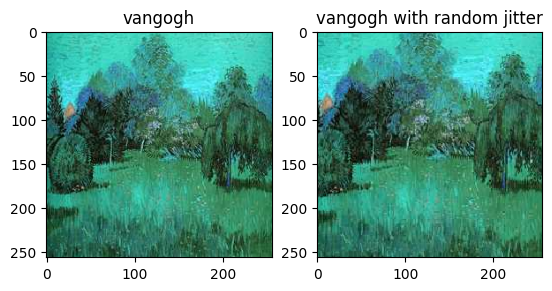

In [ ]:
plt.subplot(121)
plt.title('vangogh')
plt.imshow(images_vangogh_arr[0])

plt.subplot(122)
plt.title('vangogh with random jitter')
plt.imshow(random_jitter(images_vangogh_arr[0]))

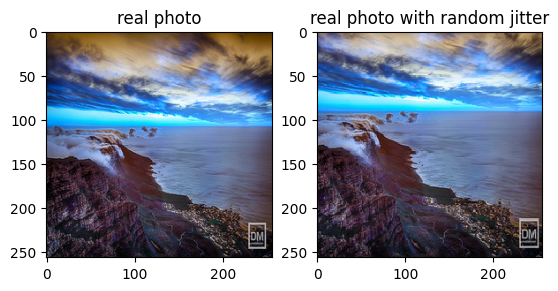

In [ ]:
plt.subplot(121)
plt.title('real photo')
plt.imshow(images_photos_arr[0])

plt.subplot(122)
plt.title('real photo with random jitter')
plt.imshow(random_jitter(images_photos_arr[0]))

In [ ]:
OUTPUT_CHANNELS = 3

generator_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
generator_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

In [ ]:
sample_photo = np.expand_dims(images_photos_arr[2],axis=0)
sample_vangogh = np.expand_dims(images_vangogh_arr[4],axis=0)

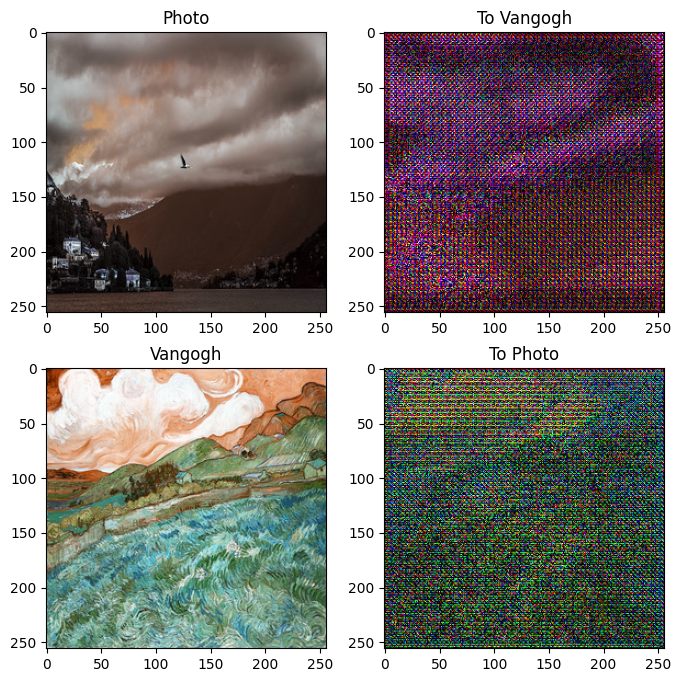

In [ ]:
to_vangogh = generator_g(sample_photo)
to_photo = generator_f(sample_vangogh)
plt.figure(figsize=(8, 8))
contrast = 3

imgs = [sample_photo, to_vangogh, sample_vangogh, to_photo]
title = ['Photo', 'To Vangogh', 'Vangogh', 'To Photo']

for i in range(len(imgs)):
  plt.subplot(2, 2, i+1)
  plt.title(title[i])
  if i % 2 == 0:
    plt.imshow(imgs[i][0])
  else:
    plt.imshow(imgs[i][0]*contrast)
plt.show()

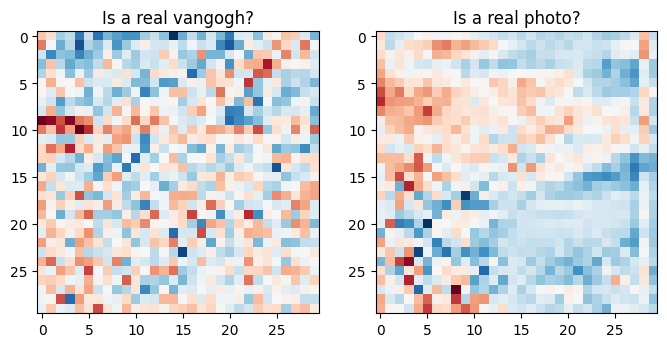

In [ ]:
plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.title('Is a real vangogh?')
plt.imshow(discriminator_y(sample_vangogh)[0, ..., -1], cmap='RdBu_r')

plt.subplot(122)
plt.title('Is a real photo?')
plt.imshow(discriminator_x(sample_photo)[0, ..., -1], cmap='RdBu_r')

plt.show()

In [ ]:
LAMBDA = 10

In [ ]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real, generated):
  real_loss = loss_obj(tf.ones_like(real), real)

  generated_loss = loss_obj(tf.zeros_like(generated), generated)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [ ]:
def generator_loss(generated):
  return loss_obj(tf.ones_like(generated), generated)

In [ ]:
def calc_cycle_loss(real_image, cycled_image):
  loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

  return LAMBDA * loss1

In [ ]:
def identity_loss(real_image, same_image):
  loss = tf.reduce_mean(tf.abs(real_image - same_image))
  return LAMBDA * loss

In [ ]:
generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [ ]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

In [ ]:
EPOCHS = 10

In [ ]:
def generate_images(model, test_input):
  prediction = model(test_input)

  plt.figure(figsize=(12, 12))

  display_list = [test_input[0], prediction[0]]
  title = ['Input Image', 'Predicted Image']

  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()

In [ ]:
@tf.function
def calculate_total_accuracy(accuracy_x, accuracy_y):
    # Average the accuracies from both discriminators
    total_accuracy = (accuracy_x + accuracy_y) / 2.0
    #total_accuracy = (accuracy_x['disc_x_accuracy'] + accuracy_y['disc_y_accuracy']) / 2.0
    return total_accuracy

In [ ]:
@tf.function
def train_step(real_x, real_y):
  # persistent is set to True because the tape is used more than
  # once to calculate the gradients.
  with tf.GradientTape(persistent=True) as tape:
    # Generator G translates X -> Y
    # Generator F translates Y -> X.

    fake_y = generator_g(real_x, training=True)
    cycled_x = generator_f(fake_y, training=True)

    fake_x = generator_f(real_y, training=True)
    cycled_y = generator_g(fake_x, training=True)

    # same_x and same_y are used for identity loss.
    same_x = generator_f(real_x, training=True)
    same_y = generator_g(real_y, training=True)

    disc_real_x = discriminator_x(real_x, training=True)
    disc_real_y = discriminator_y(real_y, training=True)

    disc_fake_x = discriminator_x(fake_x, training=True)
    disc_fake_y = discriminator_y(fake_y, training=True)

    # calculate the loss
    gen_g_loss = generator_loss(disc_fake_y)
    gen_f_loss = generator_loss(disc_fake_x)

    total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)

    # Total generator loss = adversarial loss + cycle loss
    total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
    total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)

    disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
    disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)

  # Calculate the gradients for generator and discriminator
  generator_g_gradients = tape.gradient(total_gen_g_loss,
                                        generator_g.trainable_variables)
  generator_f_gradients = tape.gradient(total_gen_f_loss,
                                        generator_f.trainable_variables)

  discriminator_x_gradients = tape.gradient(disc_x_loss,
                                            discriminator_x.trainable_variables)
  discriminator_y_gradients = tape.gradient(disc_y_loss,
                                            discriminator_y.trainable_variables)

  # Apply the gradients to the optimizer
  generator_g_optimizer.apply_gradients(zip(generator_g_gradients,
                                            generator_g.trainable_variables))

  generator_f_optimizer.apply_gradients(zip(generator_f_gradients,
                                            generator_f.trainable_variables))

  discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients,
                                                discriminator_x.trainable_variables))

  discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients,
                                                discriminator_y.trainable_variables))

  model_loss = {
        'gen_g_loss': total_gen_g_loss,
        'gen_f_loss': total_gen_f_loss,
        'disc_x_loss': disc_x_loss,
        'disc_y_loss': disc_y_loss,
        'total_cycle_loss': total_cycle_loss
  }

    # Convert losses to numpy arrays if needed
  model_loss = {key: value for key, value in model_loss.items()}

    # Assuming you want accuracy for your discriminator
  disc_x_accuracy = tf.reduce_mean(tf.cast(tf.math.less(disc_real_x, 0.5), tf.float32))
  disc_y_accuracy = tf.reduce_mean(tf.cast(tf.math.less(disc_real_y, 0.5), tf.float32))

  accuracy = {
        'disc_x_accuracy': tf.reduce_mean(tf.cast(tf.math.less(disc_real_x, 0.5), tf.float32)),
        'disc_y_accuracy': tf.reduce_mean(tf.cast(tf.math.less(disc_real_y, 0.5), tf.float32))
  }

  return model_loss, accuracy

In [ ]:
epoch_losses = {
    'gen_g_loss': [],
    'gen_f_loss': [],
    'disc_x_loss': [],
    'disc_y_loss': [],
    'total_cycle_loss': []
}

In [ ]:
epoch_accuracies = {
    'disc_x_accuracy': [],
    'disc_y_accuracy': [],
}

In [ ]:
epoch_total_accuracies = []

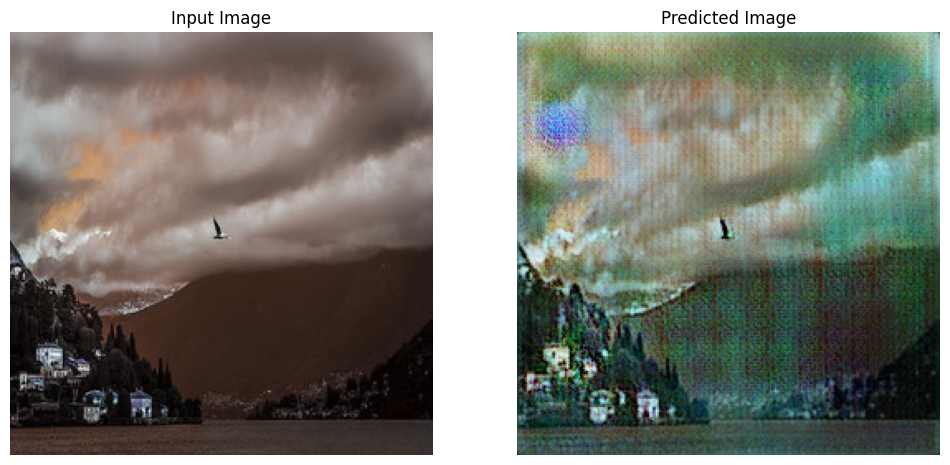

Saving checkpoint for epoch 270 at ./checkpoints/train/ckpt-54
Time taken for epoch 270 is 9.932657718658447 sec
Epoch Losses: {'gen_g_loss': <tf.Tensor: shape=(), dtype=float32, numpy=2.4339142>, 'gen_f_loss': <tf.Tensor: shape=(), dtype=float32, numpy=2.438417>, 'disc_x_loss': <tf.Tensor: shape=(), dtype=float32, numpy=1.123508>, 'disc_y_loss': <tf.Tensor: shape=(), dtype=float32, numpy=1.3050816>, 'total_cycle_loss': <tf.Tensor: shape=(), dtype=float32, numpy=1.1570066>}
Epoch Accuracies: {'disc_x_accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.68844444>, 'disc_y_accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.71925>}


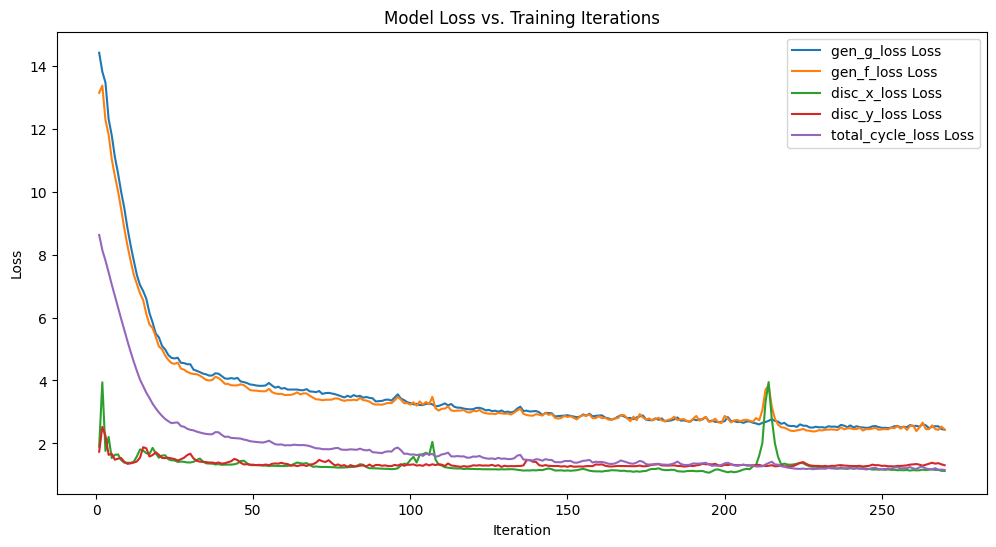

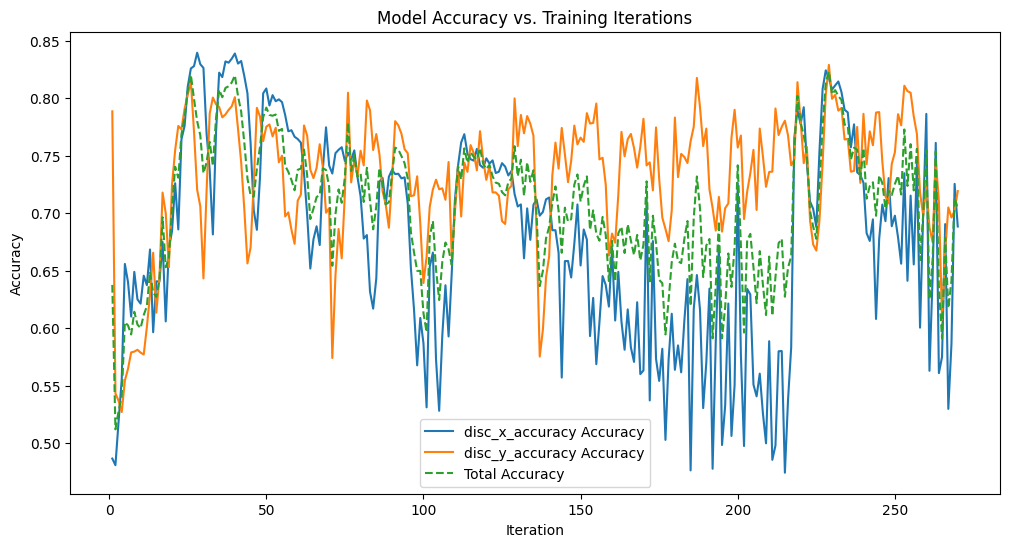

In [ ]:
for epoch in range(270):
    start = time.time()

    # Initialize cumulative epoch losses and accuracies
    cumulative_epoch_losses = {
        'gen_g_loss': 0.0,
        'gen_f_loss': 0.0,
        'disc_x_loss': 0.0,
        'disc_y_loss': 0.0,
        'total_cycle_loss': 0.0
    }

    cumulative_epoch_accuracies = {
        'disc_x_accuracy': 0.0,
        'disc_y_accuracy': 0.0
    }

    n = 0
    for image_x, image_y in zip(np.expand_dims(images_photos_arr, axis=0).astype(np.float32), np.expand_dims(images_vangogh_arr, axis=0).astype(np.float32)):
        # Execute the training step and accumulate losses and accuracy
        losses, accuracy = train_step(image_x, image_y)

        # Accumulate losses and accuracy for the epoch
        for key in cumulative_epoch_losses.keys():
            cumulative_epoch_losses[key] += losses[key]

        for key in cumulative_epoch_accuracies.keys():
            cumulative_epoch_accuracies[key] += accuracy[key]

        if n % 10 == 0:
            print('.', end='')
        n += 1

    # Calculate average losses and accuracy for the epoch
    average_epoch_losses = {
        key: cumulative_epoch_losses[key] / n
        for key in cumulative_epoch_losses.keys()
    }

    average_epoch_accuracies = {
        key: cumulative_epoch_accuracies[key] / n
        for key in cumulative_epoch_accuracies.keys()
    }

    total_epoch_accuracy = calculate_total_accuracy(average_epoch_accuracies['disc_x_accuracy'], average_epoch_accuracies['disc_y_accuracy'])
    epoch_total_accuracies.append(total_epoch_accuracy)

    # Append epoch losses and accuracy to the lists for plotting
    for key in epoch_losses.keys():
        epoch_losses[key].append(average_epoch_losses[key])

    for key in epoch_accuracies.keys():
        epoch_accuracies[key].append(average_epoch_accuracies[key])

    clear_output(wait=True)

    # Generate images after each epoch
    generate_images(generator_g, sample_photo)

    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print('Saving checkpoint for epoch {} at {}'.format(epoch + 1, ckpt_save_path))

    print('Time taken for epoch {} is {} sec'.format(epoch + 1, time.time() - start))
    print('Epoch Losses:', average_epoch_losses)
    print('Epoch Accuracies:', average_epoch_accuracies)

# Plot the losses vs. epoch
plt.figure(figsize=(12, 6))

for key, values in epoch_losses.items():
    plt.plot(range(1, len(values) + 1), values, label=f'{key} Loss')

plt.title('Model Loss vs. Training Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

for key, values in epoch_accuracies.items():
    plt.plot(range(1, len(values) + 1), values, label=f'{key} Accuracy')

plt.plot(range(1, len(epoch_total_accuracies) + 1), epoch_total_accuracies, label='Total Accuracy', linestyle='--')

plt.title('Model Accuracy vs. Training Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
epoch_total_accuracies[-2]

<tf.Tensor: shape=(), dtype=float32, numpy=0.71383333>

In [ ]:
max(epoch_total_accuracies)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8232639>

In [ ]:
# for epoch in range(200):
#   start = time.time()

#   n = 0
#   for image_x, image_y in zip(np.expand_dims(images_photos_arr, axis = 0).astype(np.float32), np.expand_dims(images_vangogh_arr, axis = 0).astype(np.float32)):
#     train_step(image_x, image_y)
#     if n % 10 == 0:
#       print ('.', end='')
#     n += 1

#   clear_output(wait=True)
#   # Using a consistent image (sample_horse) so that the progress of the model
#   # is clearly visible.
#   generate_images(generator_g, sample_photo)

#   if (epoch + 1) % 5 == 0:
#     ckpt_save_path = ckpt_manager.save()
#     print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
#                                                          ckpt_save_path))

#   print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
#                                                       time.time()-start))

In [ ]:
test_images = "/content/vangogh2photo/testB"

In [ ]:
test_images_photos = os.listdir(test_images)

In [ ]:
n_images_test = 40

In [ ]:
from tqdm import tqdm

test_images_photos_list = []

# Use tqdm with range to display a progress bar
for i in tqdm(range(n_images_test)):
    img = cv2.imread(test_images + "/" + test_images_photos[i])
    img = cv2.resize(img, (images_width, images_height))
    img = img / 255.0  # normalization
    test_images_photos_list.append(img)

test_images_photos_arr = np.array(test_images_photos_list)


In [ ]:
inp = np.expand_dims(test_images_photos_arr[26],axis=0)

In [ ]:
# Run the trained model on the test dataset

generate_images(generator_g, inp)